<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/Parcial2/solucionPunto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PUNTO 2*
# SOLUCION ▶:

🔷 Encuentre la función de transferencia que caracteriza el sistema masa–resorte–amortiguador presentado en la figura (asuma condiciones iniciales cero).

# Modelado del Sistema Mecánico (Masa-Resorte-Amortiguador)

Este documento describe el modelado matemático de un sistema dinámico compuesto por una masa, un resorte y un amortiguador, a menudo denominado "péndulo elástico amortiguado".

<br>

## 1. Definición de Variables

En el sistema representado en la figura, definimos los siguientes elementos y variables:

*   **$m$**: Masa del cuerpo.
*   **$k$**: Constante de elasticidad del resorte.
*   **$c$**: Coeficiente de fricción del amortiguador.
*   **$F_E(t)$**: Fuerza externa aplicada al sistema (entrada).
*   **$y(t)$**: Desplazamiento de la masa respecto a su posición de equilibrio (salida).

<br>

## 2. Ecuación Diferencial

La ecuación diferencial que manda el comportamiento del sistema se obtiene al considerar el equilibrio de todas las fuerzas ejercidas sobre la masa. Según la ley de equilibrio (o Segunda Ley de Newton reordenada), tenemos:

$$ F_S(t) + F_F(t) + F_I(t) = F_E(t) $$

Donde cada componente se define de la siguiente manera:

<br>

### A. Fuerza del Resorte ($F_S$)
Inducida por el resorte y regida por la **Ley de Hooke**, es proporcional al desplazamiento:
$$ F_S(t) = k y(t)$$

<br>

### B. Fuerza de Fricción / Amortiguamiento ($F_F$)
Es común modelar la fuerza del amortiguador como proporcional a la velocidad de la masa:
$$ F_F(t) = c \frac{dy(t)}{dt} $$

<br>

### C. Fuerza Inercial ($F_I$)
Debida a la aceleración de la masa, definida por la Segunda Ley de Newton:
$$ F_I(t) = m \frac{d^2y(t)}{dt^2} $$

<br>

## 3. Modelo Matemático

Al sustituir las fuerzas halladas anteriormente, en la ecuación de equilibrio , obtenemos la ecuación diferencial ordinaria (EDO) de segundo orden que describe el desplazamiento del péndulo elástico amortiguado:

$$ m \frac{d^2y(t)}{dt^2} + c \frac{dy(t)}{dt} + k y(t) = F_E(t)$$

<br>

### Interpretación como Sistema
La ecuación anterior constituye una **EDO lineal con coeficientes constantes**. Este sistema puede interpretarse como un sistema Lineal e Invariante en el Tiempo (SLTI) donde:

*   La **Entrada** es la fuerza externa: $x(t) = F_E(t)$.
*   La **Salida** es el desplazamiento de la masa: $y(t)$.

# 4. Modelo en el Dominio de Laplace y Función de Transferencia

Para analizar este sistema como un **SLIT** en el dominio de Laplace, partimos de la ecuación diferencial obtenida:

$$ m\frac{d^2y(t)}{dt^2} + c\frac{dy(t)}{dt} + k y(t) = F_E(t) $$

<br>

Asumimos que el sistema parte desde **reposo** (condiciones iniciales cero):

$$ y(0) = 0, \quad \dot{y}(0) = 0 $$

<br>

## Aplicación de la Transformada de Laplace

Usando la transformada unilateral de Laplace y las propiedades para derivadas:

$$ \mathcal{L}\left\{ \frac{d^2y(t)}{dt^2} \right\} = s^2Y(s) $$

$$ \mathcal{L}\left\{ \frac{dy(t)}{dt} \right\} = sY(s) $$

$$ \mathcal{L}\{y(t)\} = Y(s) $$
<br>
$$\mathcal{L}\{F_E(t)\} = F_E(s) $$

<br>

La ecuación en el dominio del tiempo se transforma en:

$$ m s^2 Y(s) + c s Y(s) + k Y(s) = F_E(s) $$

<br>

Factorizando $Y(s)$:

$$ Y(s) (ms^2 + cs + k) = F_E(s) $$

<br>

##Función de Transferencia del Sistema Mecánico

La función de transferencia se define como la relación entre la salida y la entrada en el dominio de Laplace, con condiciones iniciales nulas:

$$ H(s) = \frac{Y(s)}{F_E(s)} $$

<br>

A partir de la ecuación anterior:

$$ \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k} $$

<br>

Por lo tanto, la función de transferencia del sistema masa–resorte–amortiguador es:

$$ H(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k} $$

<br>

Aquí:

*   El **numerador** es 1 (no hay ceros finitos).
*   El **denominador** $ms^2 + cs + k $   es un polinomio de segundo orden en
s; sus raíces corresponden a los polos del sistema, y son las que determinan el tipo de respuesta dinámica (subamortiguada, sobreamortiguada o críticamente amortiguada).

In [ ]:
print("EDO:")
print()

%matplotlib inline
import sympy as sym
sym.init_printing() #fórmulas matemáticas tipo LaTeX

#Define las variables simbólicas: t (tiempo), m (masa), c (amortiguador), k (resorte)
t, m, c, k = sym.symbols('t m c k', real=True)

x = sym.Function('x')(t) #representa la Fuerza de Entrada
y = sym.Function('y')(t) #representa el Desplazamiento/Salida

#Crea la ecuacióndiferencial:
ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

EDO:



                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

In [ ]:
print("FUNCIÓN DE TRANSFERENCIA:")
print()
s = sym.symbols('s') # Define la variable simbólica 's'
H = sym.Function('H')(s) # H representa la Función de Transferencia

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H) # Sustituye las señales por exponenciales (e^st), calcula las derivadas automáticamente y despeja H para encontrar la Función de Transferencia del sistema.

H #muestra la funcion de transferencia


FUNCIÓN DE TRANSFERENCIA:



      1       
──────────────
             2
c⋅s + k + m⋅s 

# Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortiguador, a partir del siguiente circuito eléctrico:
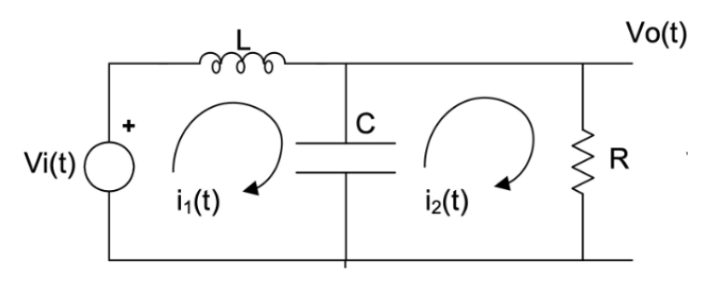

# ✅ Calculando la Funcion de transferencia del circuito RLC en paralelo obtenemos:

$$ \boxed{H(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{LCs^2 + \frac{L}{R}s + 1}} $$
<br>
# ✅calculando la EDO del circuito obtenemos:


$$ \boxed{ C L \frac{d^2}{dt^2} y_e(t) + \frac{L \frac{d}{dt} y_e(t)}{R} + y_e(t) = x_e(t) } $$

<br>

# ✅Comparacion de funciones de transferencia:

Modelo masa–resorte–amortiguador:

$$ H_m(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k} $$

<br>

Circuito RLC paralelo:

$$ H(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{LCs^2 + \frac{L}{R}s + 1} $$

<br>

Para que el circuito se comporte igual que el sistema masa–resorte–amortiguador, igualamos coeficientes del denominador:

$$ ms^2 + cs + k \quad \iff \quad LCs^2 + \frac{L}{R}s + 1 $$

<br>

De aquí sale el **sistema equivalente**:

$$ \boxed{ m_{\text{eq}} = LC, \quad c_{\text{eq}} = \frac{L}{R}, \quad k_{\text{eq}} = 1 } $$

<br>

Y la correspondencia de señales:

$$ F_E(t) \leftrightarrow V_i(t), \quad y(t) \leftrightarrow V_o(t) $$

<br>

**Es decir:**
> El circuito RLC paralelo representa un sistema masa–resorte–amortiguador con masa equivalente $m_{\text{eq}} = LC$, coeficiente de amortiguamiento $c_{\text{eq}} = L/R$ y constante de resorte $k_{\text{eq}} = 1$.


# ✅Comparacion de la EDO:

$$ m\ddot{y}(t) + c\dot{y}(t) + ky(t) = F_E(t) $$

<br>

**Eléctrico (RLC paralelo):**

$$ LC \ddot{y}_e(t) + \frac{L}{R} \dot{y}_e(t) + y_e(t) = x_e(t) $$

<br>

**Haciendo:**

$$ m = LC, \quad c = \frac{L}{R}, \quad k = 1, \quad F_E(t) = x_e(t), \quad y(t) = y_e(t) $$

<br>

se obtiene exactamente la misma forma de ecuación.

# Finalmente, proponga unos valores de $m$, $k$ y $c$ y sus equivalentes $R$, $L$ y $C$, para simular un sistema subamortiguado, sobreamortiguado y de amortiguamiento crítico (determine el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo pico, tiempo de levantamiento y el tiempo de establecimiento en cada caso). Para cada caso, grafique el diagrama de polos y ceros, el diagrama de Bode, la respuesta impulso, respuesta escalón y respuesta rampa. Repita el proceso para modo lazo cerrado.

## 1. Selección de valores de $m, k, c$ y equivalentes eléctricos $R, L, C$

Queremos proponer valores de $m$, $k$ y $c$ (modelo masa–resorte–amortiguador) y sus equivalentes $R$, $L$ y $C$ (circuito RLC en paralelo) para obtener tres tipos de sistemas:

- Sistema **subamortiguado** ($0 < \zeta < 1$)
- Sistema **críticamente amortiguado** ($\zeta = 1$)
- Sistema **sobreamortiguado** ($\zeta > 1$)

Trabajamos con un SLIT de segundo orden cuya función de transferencia es:

$$ H(s) = \frac{1}{m s^{2} + c s + k} $$

De la teoría tenemos:

*   **Frecuencia natural no amortiguada**
    $$ \omega_n = \sqrt{\frac{k}{m}} $$

*   **Factor de amortiguamiento**
    $$ \zeta = \frac{c}{2\sqrt{k m}} $$

*   **Frecuencia natural amortiguada** (solo cuando $0 < \zeta < 1$)
    $$ \omega_d = \omega_n \sqrt{1 - \zeta^2} $$

Para el caso **subamortiguado**, se usan además las siguientes expresiones aproximadas:

### Tiempos característicos (sistema de 2º orden)

Para un sistema de segundo orden con frecuencia natural $\omega_n$ y factor de amortiguamiento $\zeta$:

*   **Tiempo pico ($t_p$):**
    Es el tiempo en el que ocurre el primer sobre–impulso. Se obtiene al igualar la derivada a cero:
    $$ t_p = \frac{\pi}{\omega_n\sqrt{1-\zeta^2}} $$

*   **Tiempo de levantamiento ($t_u$):**
    Es el tiempo necesario para que la respuesta vaya aproximadamente del **0 % al 100 %** (o del 10 % al 90 %) de su valor final. En este trabajo se toma a partir de la gráfica de la respuesta temporal.

*   **Tiempo de establecimiento ($t_s$):**
    Es el tiempo que tarda la respuesta en entrar y permanecer dentro de una banda del **$\pm 5\%$** del valor de equilibrio:
    $$ t_s = \frac{3}{\zeta \,\omega_n} $$

<br>

### Equivalencia eléctrica

Para el **circuito RLC en paralelo equivalente** se tiene la correspondencia:

$$ m = L C,\qquad c = \frac{L}{R},\qquad k = 1 $$

Para simplificar los cálculos elegimos en todos los casos:

$$ m = 1,\quad k = 1,\quad L = 1~\text{H},\quad C = 1~\text{F} $$

De esta forma se cumple $m = LC = 1$ y la relación entre $c$ y $R$ queda:

$$ R = \frac{L}{c} = \frac{1}{c} $$

# ✅ "SUBAMORTIGUADO – RLC paralelo – LAZO ABIERTO "

In [61]:
# Cálculo de parámetros dinámicos para el caso SUBAMORTIGUADO

m = 1.0
k = 1.0
c = 0.6   # por ejemplo, para ζ ≈ 0.3  (0 < ζ < 1)

wn   = (k/m)**0.5                 # ω_n = sqrt(k/m)
zeta = c / (2*(k*m)**0.5)         # ζ  = c / (2*sqrt(km))

# En subamortiguado (0<ζ<1) sí hay oscilaciones → calculamos ω_d y t_p
wd = wn*(1 - zeta**2)**0.5        # ω_d = ω_n sqrt(1-ζ²)
tp = sym.pi / wd                  # t_p = π/ω_d

ts = 3 / (zeta*wn)                # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (SUBAMORTIGUADO)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      =", wd)
print("t_p      =", tp)
print("t_u      = se toma de la gráfica (0–100%)")
print("t_s      =", ts)


Parámetros dinámicos (SUBAMORTIGUADO)
m = 1.0 , k = 1.0 , c = 0.6
ω_n      = 1.0
ζ        = 0.3
ω_d      = 0.9539392014169457
t_p      = 1.04828483672192*pi
t_u      = se toma de la gráfica (0–100%)
t_s      = 10.0


In [62]:
import sympy as sym
import sympy.physics.control as control
import matplotlib.pyplot as plt

sym.init_printing()

print("SUBAMORTIGUADO – RLC paralelo – LAZO ABIERTO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 0.6         # 0 < ζ < 1  → subamortiguado

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO para el RLC paralelo:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Pasamos a la API de control (num y den simbólicos)
H_num, H_den = sym.fraction(sym.simplify(H_sym))
HRLC_abierto = control.TransferFunction(H_num, H_den, s)

print("\nH(s) :")
HRLC_abierto



SUBAMORTIGUADO – RLC paralelo – LAZO ABIERTO

R = 1.6666666666666667 ohm,  L = 1.0 H,  C = 1.0 F

H(s) :


        1         
──────────────────
     2            
1.0⋅s  + 0.6⋅s + 1

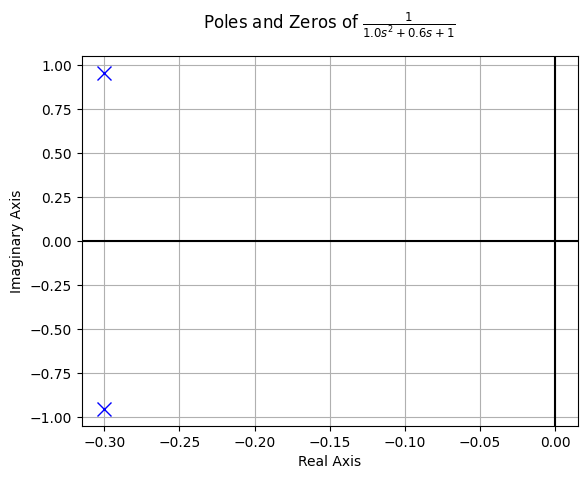

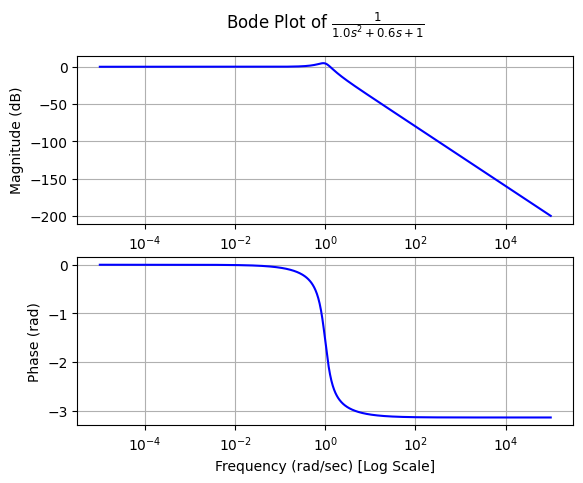

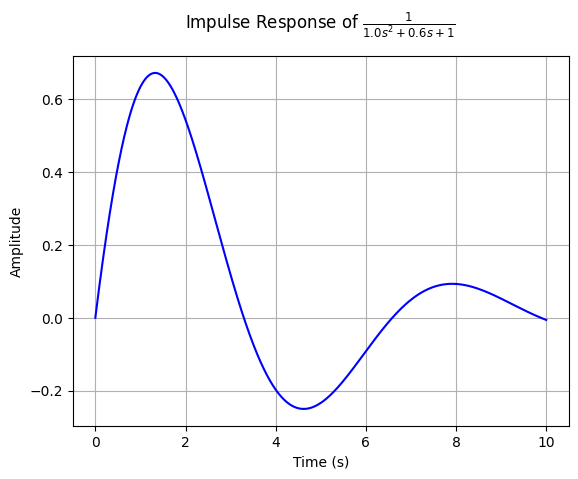

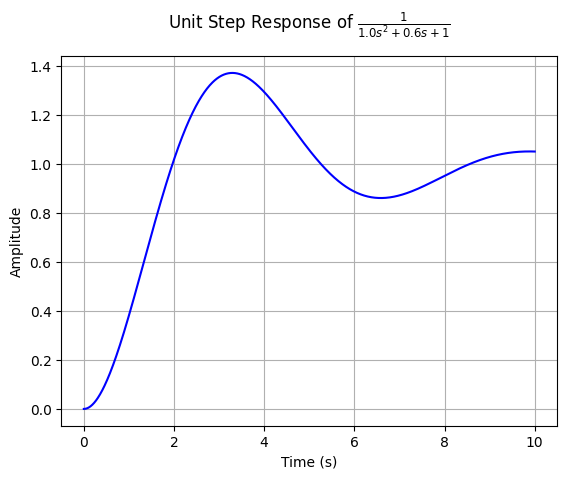

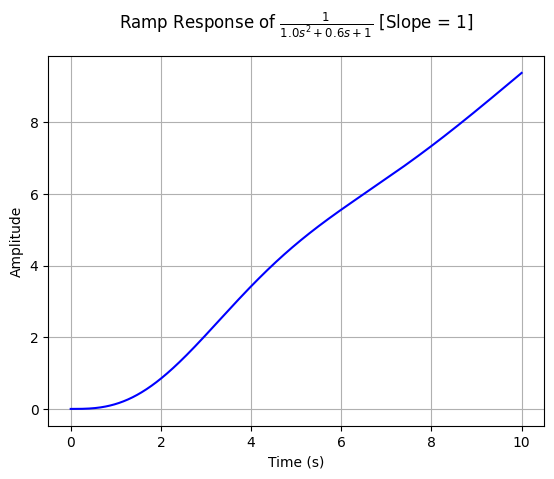

In [64]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_abierto)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_abierto)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_abierto)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_abierto)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_abierto)


✅ SOBREAMORTIGUADO

In [59]:
# Cálculo de parámetros dinámicos para el caso SOBREAMORTIGUADO

m= 1.0
k = 1.0
c = 4.0   # por ejemplo, para ζ=2

wn  = (k/m)**0.5                     # ω_n = sqrt(k/m)
zeta = c/ (2*(k*m)**0.5)       # ζ  = c / (2*sqrt(km))

# En sobreamortiguado (ζ>1) no hay oscilaciones → ω_d y t_p no aplican
ts= 3 / (zeta* wn)                  # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (SOBREAMORTIGUADO)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      = no aplica (ζ>1, sin oscilaciones)")
print("t_p      = no aplica (sin sobreimpulso)")
print("t_u      = no aplica (respuesta monótona)")
print("t_s      =", ts)


Parámetros dinámicos (SOBREAMORTIGUADO)
m = 1.0 , k = 1.0 , c = 4.0
ω_n      = 1.0
ζ        = 2.0
ω_d      = no aplica (ζ>1, sin oscilaciones)
t_p      = no aplica (sin sobreimpulso)
t_u      = no aplica (respuesta monótona)
t_s      = 1.5


In [56]:
import sympy as sym
import sympy.physics.control as control
import matplotlib.pyplot as plt

sym.init_printing()

print("SOBREAMORTIGUADO – RLC paralelo – LAZO ABIERTO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 4.0         # ζ > 1  → sobreamortiguado

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO para el RLC paralelo:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Pasamos a la API de control (num y den simbólicos)
H_num, H_den = sym.fraction(sym.simplify(H_sym))
HRLC_abierto = control.TransferFunction(H_num, H_den, s)

print("\nH(s) :")
HRLC_abierto



SOBREAMORTIGUADO – RLC paralelo – LAZO ABIERTO

R = 0.25 ohm,  L = 1.0 H,  C = 1.0 F

H(s) :


        1         
──────────────────
     2            
1.0⋅s  + 4.0⋅s + 1

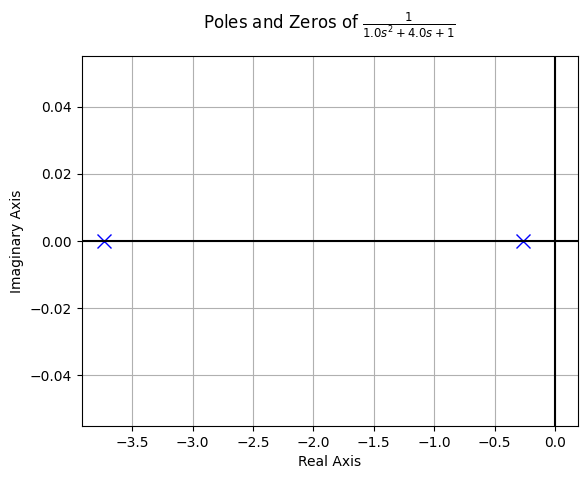

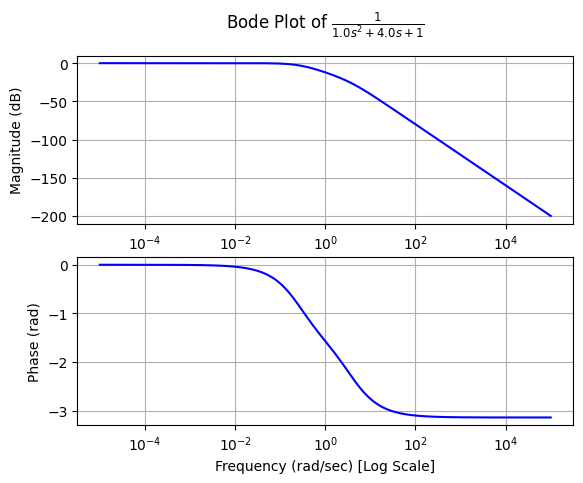

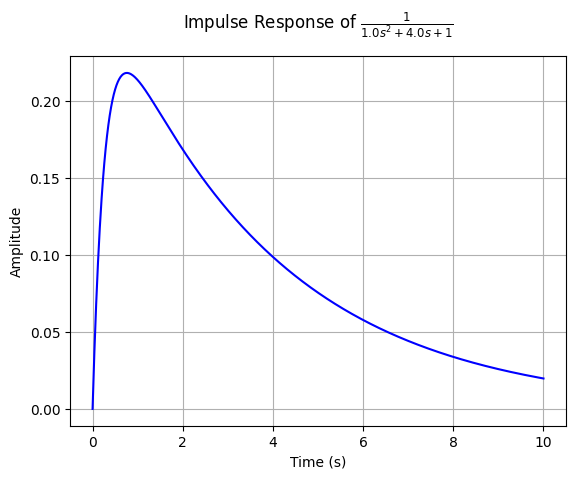

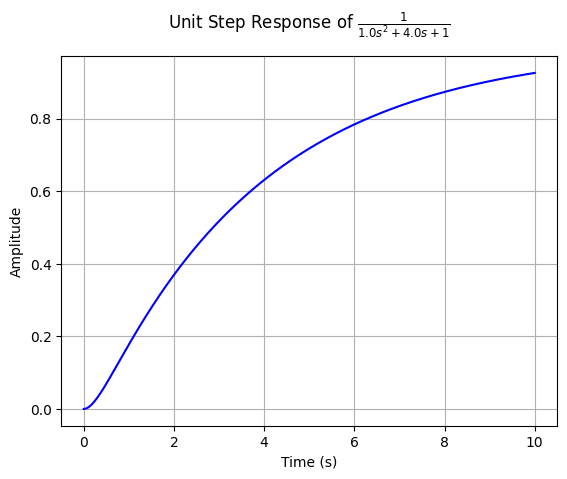

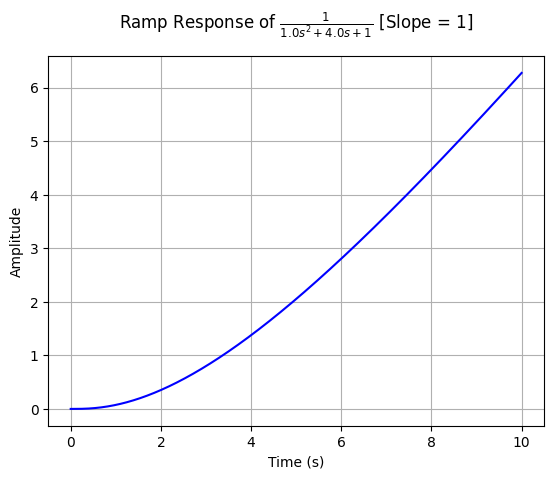

In [57]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_abierto)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_abierto)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_abierto)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_abierto)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_abierto)


# ✅ AMARTIGUAMIENTO CRITICO

In [65]:
# Cálculo de parámetros dinámicos para el caso AMORTIGUAMIENTO CRÍTICO

import sympy as sym

m = 1.0
k = 1.0
c = 2.0   # ζ = 1  → amortiguamiento crítico

wn   = (k/m)**0.5              # ω_n = sqrt(k/m)
zeta = c / (2*(k*m)**0.5)      # ζ  = c / (2*sqrt(km))

# En crítico (ζ = 1) no hay oscilaciones → ω_d y t_p no aplican
ts = 3 / (zeta*wn)             # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (AMORTIGUAMIENTO CRÍTICO)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      = no aplica (ζ = 1, sin oscilaciones)")
print("t_p      = no aplica (sin sobreimpulso)")
print("t_u      = no aplica (respuesta monótona)")
print("t_s      =", ts)


Parámetros dinámicos (AMORTIGUAMIENTO CRÍTICO)
m = 1.0 , k = 1.0 , c = 2.0
ω_n      = 1.0
ζ        = 1.0
ω_d      = no aplica (ζ = 1, sin oscilaciones)
t_p      = no aplica (sin sobreimpulso)
t_u      = no aplica (respuesta monótona)
t_s      = 3.0


In [66]:
print("AMORTIGUAMIENTO CRÍTICO – RLC paralelo – LAZO ABIERTO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 2.0         # ζ = 1  → crítico

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO para el RLC paralelo:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Pasamos a la API de control (num y den simbólicos)
H_num, H_den = sym.fraction(sym.simplify(H_sym))
HRLC_abierto = control.TransferFunction(H_num, H_den, s)

print("\nH(s) :")
HRLC_abierto


AMORTIGUAMIENTO CRÍTICO – RLC paralelo – LAZO ABIERTO

R = 0.5 ohm,  L = 1.0 H,  C = 1.0 F

H(s) :


        1         
──────────────────
     2            
1.0⋅s  + 2.0⋅s + 1

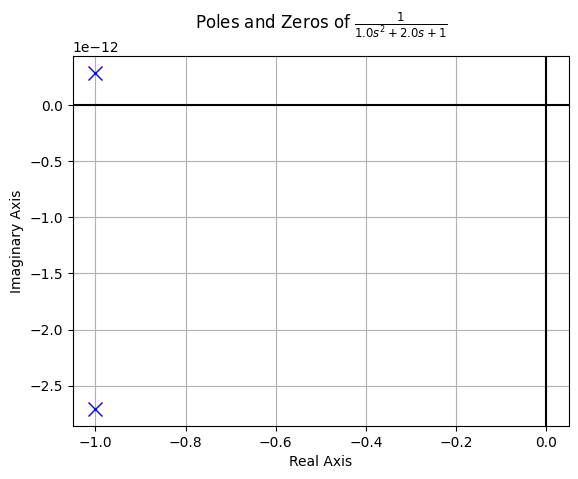

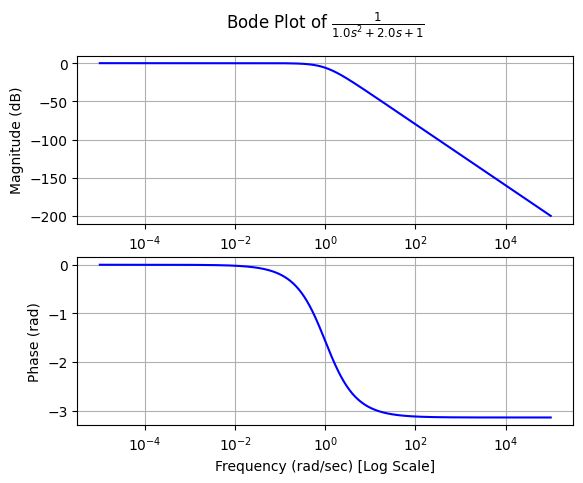

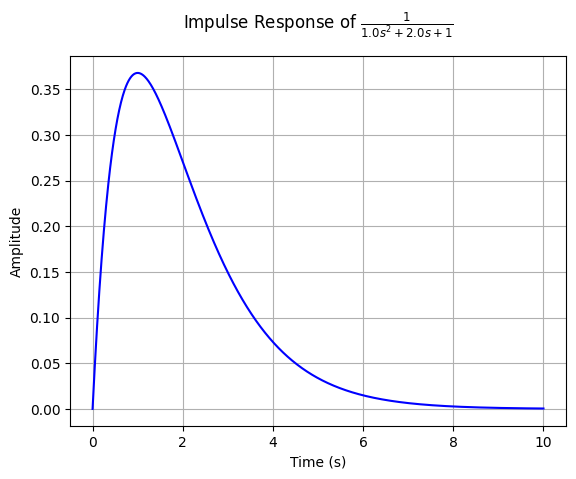

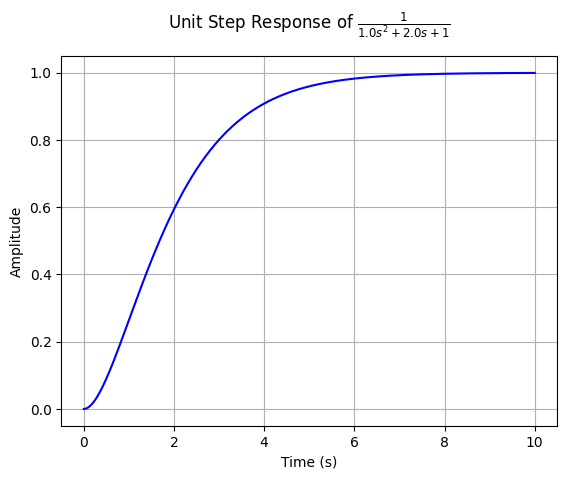

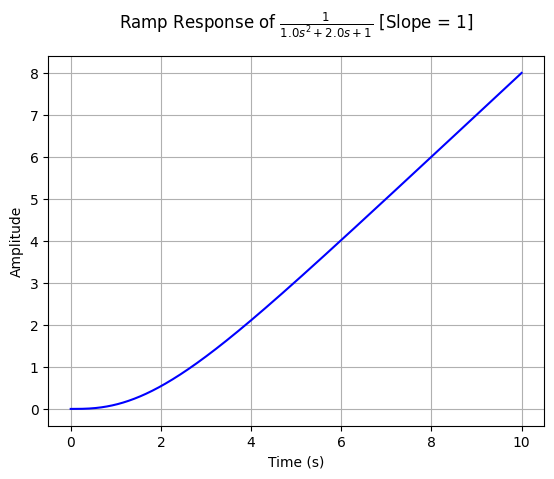

In [67]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_abierto)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_abierto)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_abierto)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_abierto)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_abierto)


Subamortiguado → respuesta rápida, con oscilaciones y sobreimpulso.

Crítico → respuesta más rápida posible sin sobreimpulso.

Sobreamortiguado → respuesta más lenta pero estable, sin oscilaciones.

# ✅ SUBAMORTIGUADO LAZO CERRADO

In [68]:
# Cálculo de parámetros dinámicos para el caso SUBAMORTIGUADO

import sympy as sym

m = 1.0
k = 1.0
c = 0.6   # ζ ≈ 0.3  → subamortiguado

wn   = (k/m)**0.5                 # ω_n = sqrt(k/m)
zeta = c / (2*(k*m)**0.5)         # ζ  = c / (2*sqrt(km))
wd   = wn*(1 - zeta**2)**0.5      # ω_d = ω_n sqrt(1-ζ²)

tp = sym.pi / wd                  # t_p = π/ω_d
ts = 3 / (zeta*wn)                # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (SUBAMORTIGUADO, usados en lazo cerrado)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      =", wd)
print("t_p      =", tp)
print("t_u      = se toma de la gráfica (0–100%)")
print("t_s      =", ts)


Parámetros dinámicos (SUBAMORTIGUADO, usados en lazo cerrado)
m = 1.0 , k = 1.0 , c = 0.6
ω_n      = 1.0
ζ        = 0.3
ω_d      = 0.9539392014169457
t_p      = 1.04828483672192*pi
t_u      = se toma de la gráfica (0–100%)
t_s      = 10.0


In [69]:
print("SUBAMORTIGUADO – RLC paralelo – LAZO CERRADO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 0.6         # subamortiguado

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO para el RLC paralelo:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Función de transferencia en LAZO CERRADO con realimentación unitaria:
# T(s) = H(s) / (1 + H(s))
T_sym = H_sym / (1 + H_sym)

# Pasamos a la API de control (num y den simbólicos)
T_num, T_den = sym.fraction(sym.simplify(T_sym))
HRLC_cerrado = control.TransferFunction(T_num, T_den, s)

print("\nT(s) lazo cerrado :")
HRLC_cerrado


SUBAMORTIGUADO – RLC paralelo – LAZO CERRADO

R = 1.6666666666666667 ohm,  L = 1.0 H,  C = 1.0 F

T(s) lazo cerrado :


        1         
──────────────────
     2            
1.0⋅s  + 0.6⋅s + 2

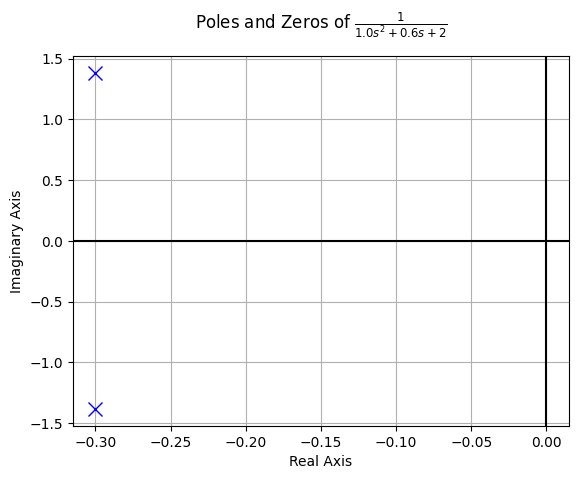

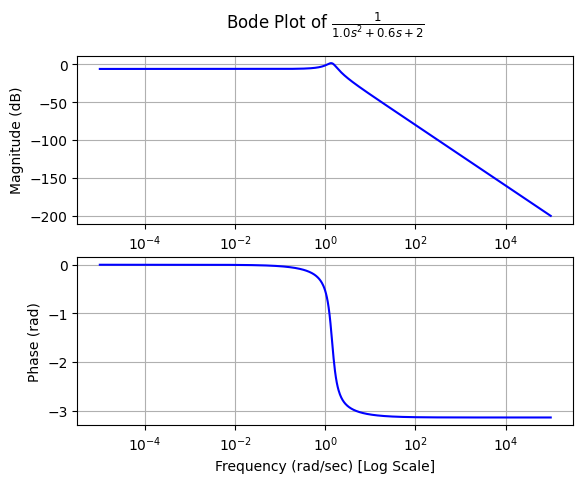

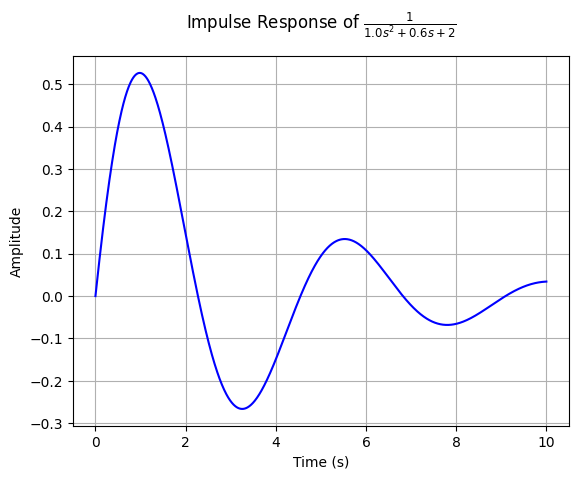

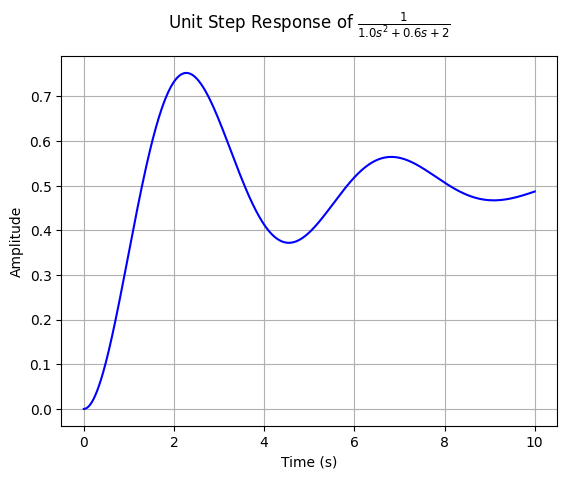

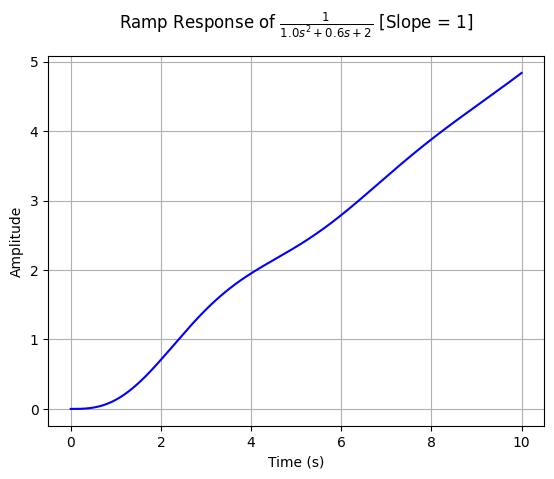

In [70]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_cerrado)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_cerrado)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_cerrado)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_cerrado)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_cerrado)


# ✅ SOBREAMARTIGUADO (LAZO CERRADO)

In [74]:
# Cálculo de parámetros dinámicos para el caso SOBREAMORTIGUADO

m = 1.0
k = 1.0
c = 4.0   # ζ > 1  → sobreamortiguado

wn   = (k/m)**0.5              # ω_n = sqrt(k/m)
zeta = c / (2*(k*m)**0.5)      # ζ  = c / (2*sqrt(km))

# En sobreamortiguado (ζ>1) no hay oscilaciones → ω_d y t_p no aplican
ts = 3 / (zeta*wn)             # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (SOBREAMORTIGUADO, lazo cerrado)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      = no aplica (ζ>1, sin oscilaciones)")
print("t_p      = no aplica (sin sobreimpulso)")
print("t_u      = no aplica (respuesta monótona)")
print("t_s      =", ts)


Parámetros dinámicos (SOBREAMORTIGUADO, lazo cerrado)
m = 1.0 , k = 1.0 , c = 4.0
ω_n      = 1.0
ζ        = 2.0
ω_d      = no aplica (ζ>1, sin oscilaciones)
t_p      = no aplica (sin sobreimpulso)
t_u      = no aplica (respuesta monótona)
t_s      = 1.5


In [71]:
print("SOBREAMORTIGUADO – RLC paralelo – LAZO CERRADO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 4.0         # ζ > 1  → sobreamortiguado

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Función de transferencia en LAZO CERRADO con realimentación unitaria:
# T(s) = H(s) / (1 + H(s))
T_sym = H_sym / (1 + H_sym)

# Pasamos a la API de control (num y den simbólicos)
T_num, T_den = sym.fraction(sym.simplify(T_sym))
HRLC_cerrado = control.TransferFunction(T_num, T_den, s)

print("\nT(s) lazo cerrado :")
HRLC_cerrado


SOBREAMORTIGUADO – RLC paralelo – LAZO CERRADO

R = 0.25 ohm,  L = 1.0 H,  C = 1.0 F

T(s) lazo cerrado :


        1         
──────────────────
     2            
1.0⋅s  + 4.0⋅s + 2

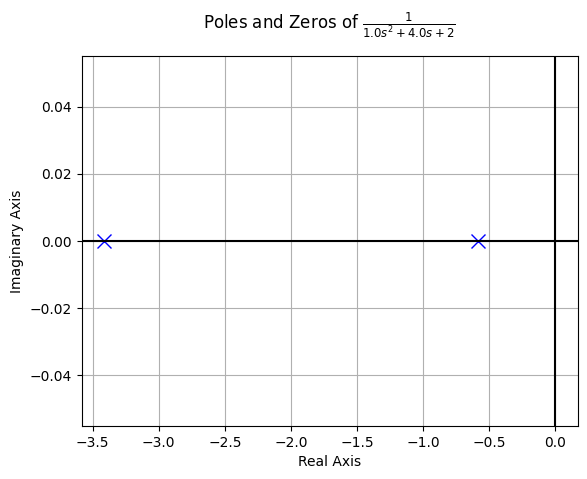

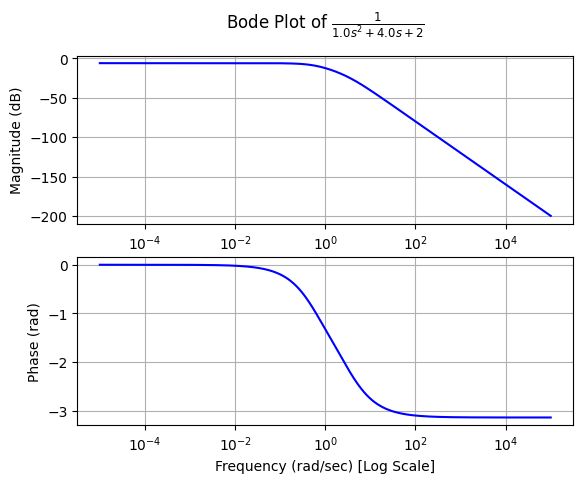

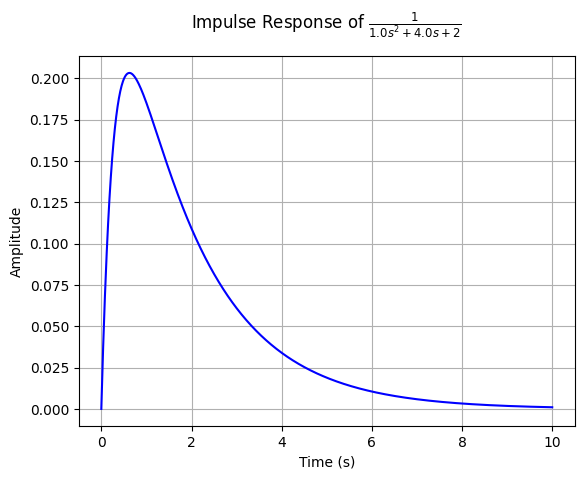

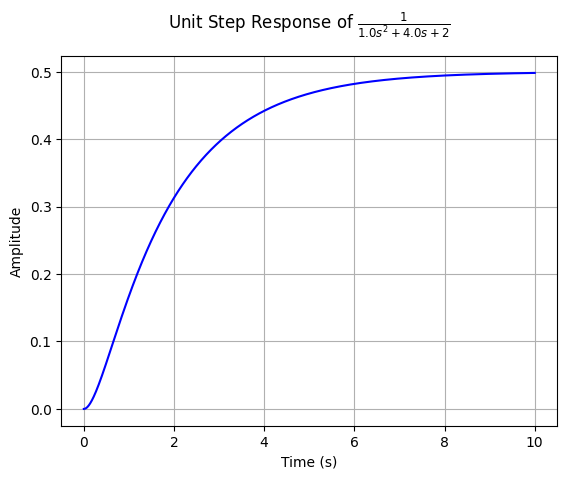

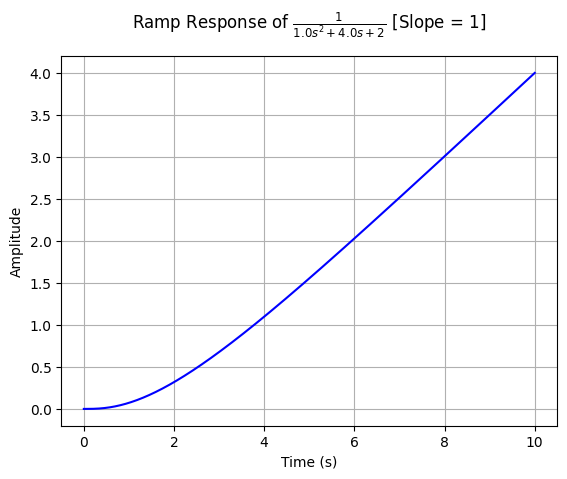

In [72]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_cerrado)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_cerrado)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_cerrado)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_cerrado)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_cerrado)


# ✅ AMARTIGUAMIENTO CRITICO (lazo cerrado)

In [75]:
# Cálculo de parámetros dinámicos para el caso AMORTIGUAMIENTO CRÍTICO

import sympy as sym

m = 1.0
k = 1.0
c = 2.0   # ζ = 1  → crítico

wn   = (k/m)**0.5              # ω_n = sqrt(k/m)
zeta = c / (2*(k*m)**0.5)      # ζ  = c / (2*sqrt(km))

# En crítico (ζ = 1) no hay oscilaciones → ω_d y t_p no aplican
ts = 3 / (zeta*wn)             # t_s ≈ 3/(ζ ω_n)

print("Parámetros dinámicos (AMORTIGUAMIENTO CRÍTICO, lazo cerrado)")
print("m =", m, ", k =", k, ", c =", c)
print("ω_n      =", wn)
print("ζ        =", zeta)
print("ω_d      = no aplica (ζ = 1, sin oscilaciones)")
print("t_p      = no aplica (sin sobreimpulso)")
print("t_u      = no aplica (respuesta monótona)")
print("t_s      =", ts)


Parámetros dinámicos (AMORTIGUAMIENTO CRÍTICO, lazo cerrado)
m = 1.0 , k = 1.0 , c = 2.0
ω_n      = 1.0
ζ        = 1.0
ω_d      = no aplica (ζ = 1, sin oscilaciones)
t_p      = no aplica (sin sobreimpulso)
t_u      = no aplica (respuesta monótona)
t_s      = 3.0


In [77]:
print("AMORTIGUAMIENTO CRÍTICO – RLC paralelo – LAZO CERRADO\n")

# Parámetros equivalentes (masa–resorte–amortiguador)
m = 1.0
k = 1.0
c = 2.0         # ζ = 1  → crítico

# Parámetros eléctricos equivalentes
L = 1.0         # H
C = 1.0         # F   (m = L*C = 1)
R = L / c

print("R =", R, "ohm,  L =", L, "H,  C =", C, "F")

# Variable s
s = sym.symbols('s', complex=True)

# Función de transferencia en lazo ABIERTO:
# H(s) = 1 / (L*C*s**2 + (L/R)*s + 1)
H_sym = 1 / (L*C*s**2 + (L/R)*s + 1)

# Función de transferencia en LAZO CERRADO con realimentación unitaria:
# T(s) = H(s) / (1 + H(s))
T_sym = H_sym / (1 + H_sym)

# Pasamos a la API de control (num y den simbólicos)
T_num, T_den = sym.fraction(sym.simplify(T_sym))
HRLC_cerrado = control.TransferFunction(T_num, T_den, s)

print("\nT(s) lazo cerrado :")
HRLC_cerrado


AMORTIGUAMIENTO CRÍTICO – RLC paralelo – LAZO CERRADO

R = 0.5 ohm,  L = 1.0 H,  C = 1.0 F

T(s) lazo cerrado :


        1         
──────────────────
     2            
1.0⋅s  + 2.0⋅s + 2

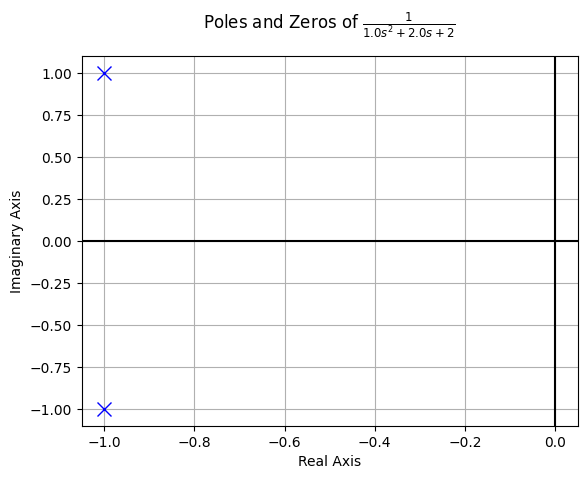

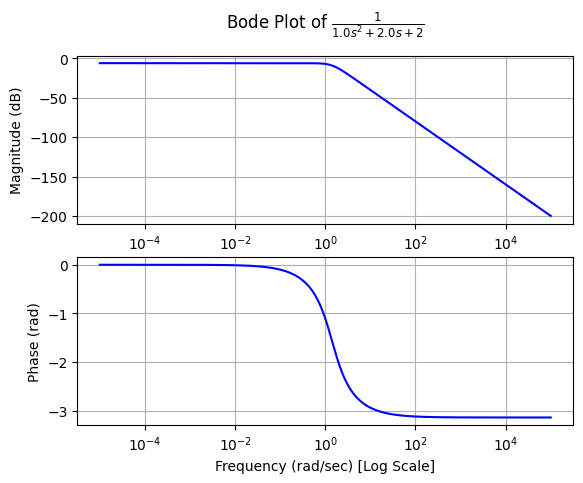

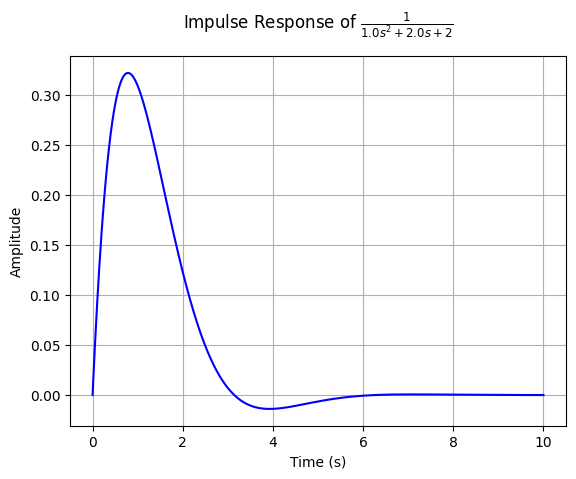

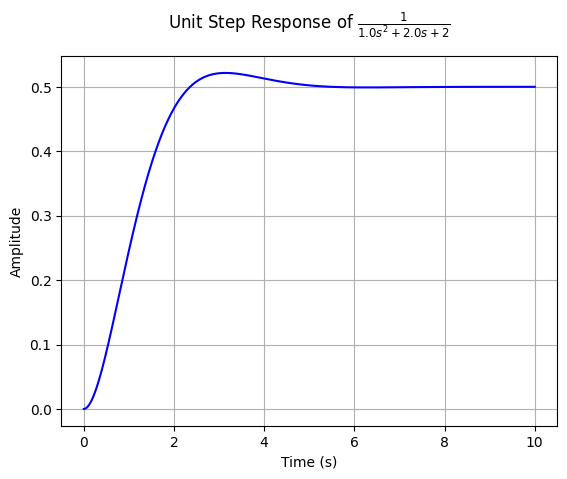

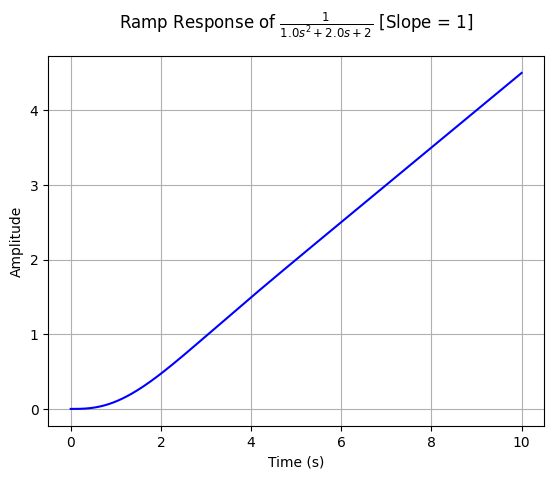

In [78]:
# Diagrama de polos y ceros
control.pole_zero_plot(HRLC_cerrado)

print()

# Diagrama de Bode (magnitud y fase)
control.bode_plot(HRLC_cerrado)

print()

# Respuesta al impulso
control.impulse_response_plot(HRLC_cerrado)

print()

# Respuesta al escalón
control.step_response_plot(HRLC_cerrado)

print()

# Respuesta a la rampa
control.ramp_response_plot(HRLC_cerrado)


# conclusiones

Subamortiguado

Lazo abierto: muchas oscilaciones y sobreimpulso alto; tarda en asentarse.

Lazo cerrado: las oscilaciones y el sobreimpulso disminuyen, la respuesta es más controlada y se estabiliza más rápido.

Amortiguamiento crítico

Lazo abierto: respuesta monótona, sin oscilaciones, pero puede ser un poco lenta según los parámetros.

Lazo cerrado: sigue sin oscilaciones, pero en general llega más rápido al valor final y con mejor seguimiento de la referencia.

Sobreamortiguado

Lazo abierto: respuesta muy lenta, monótona, sin sobreimpulso; el sistema tarda bastante en alcanzar el valor final.

Lazo cerrado: sigue siendo sin oscilaciones, pero la realimentación hace que el sistema sea menos lento y reduzca el tiempo de establecimiento comparado con el lazo abierto